<a href="https://colab.research.google.com/github/MaxYarosh/ML-projects/blob/main/Cancer_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Мета проєкту**

Класифікувати клітини як 'malignant' (злоякісні) або 'benign' (доброякісні) за допомогою моделей машинного навчання на базі бібліотеки Scikit-learn.

Деталі датасету (Breast Cancer Wisconsin — Diagnostic):


*   Містить 569 зразків (tumor samples).
*   Має 30 ознак: радіус, текстура, периметр, площа тощо, що описують форму, текстуру і розміри клітин/утворів.






Класова мітка:


*  0 — Malignant (злоякісний)
*   1 — Benign (доброякісний)






In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
312,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,0.06140,...,14.19,16.40,92.04,618.8,0.11940,0.2208,0.1769,0.08411,0.2564,0.08253
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
57,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.3587,0.18340,0.3698,0.10940
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,13.75,21.38,91.11,583.1,0.12560,0.1928,0.1167,0.05556,0.2661,0.07961
64,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,17.09,33.47,111.80,888.3,0.18510,0.4061,0.4024,0.17160,0.3383,0.10310


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df2=pd.DataFrame(data.target,columns=['target'])
df2.sample(5)

,target
145,1
421,1
32,0
454,1
66,1


([<matplotlib.patches.Wedge at 0x7978c4dab6b0>,
 [Text(-0.4286547583668386, 1.0130424957174637, '1'),
  Text(0.4286549676938969, -1.0130424071436221, '0')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

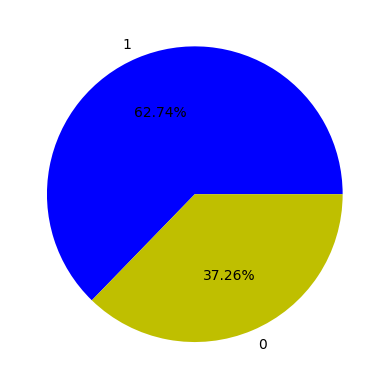

In [7]:
class_counts=df2["target"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=['b', 'y'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[1 0 0 1 1 0 0 0 0 1]


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nconfusion matrix :\n", confusion_matrix(y_test, y_pred))
print("\nЗвіт класифікації:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Model Accuracy: 94.30%

confusion matrix :
 [[ 73   7]
 [  6 142]]

Звіт класифікації:
               precision    recall  f1-score   support

   malignant       0.92      0.91      0.92        80
      benign       0.95      0.96      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228

